## Word normalization
The previous lesson demonstrated using regex to answer Eliza questions. In this lesson, we will use regex and python NLP utility libraries to process text. 

# Demo

## Tokenization using 📚 nltk 📚

NLTK is python library. It is used for natural language processing. It has many features like tokenization, stemming, lemmatization, POS tagging, etc.
Today we will see how to use NLTK for tokenization.

NLTK offers many different types of tokenizers based on your use case. We will see some of them here.
1. Word Tokenizer
2. Sentence Tokenizer
3. Regexp Tokenizer


#### Word Tokenizer
* Word tokenizer is used to tokenize the text into words. 
* It is used to split a sentence into words. It uses the space between two words to split the sentence. 
* It uses a simple logic that is also quite prone to errors. Let’s see an example of how it works.


In [ ]:
from nltk.tokenize import word_tokenize
text = "I am learning NLP"
word_tokenize(text)

#### Sentence Tokenizer
* Sentence tokenizer is used to tokenize the text into sentences.
* It is used to split a paragraph or a large sentence into sentences.
* It uses periods (.) to split the text into sentences.


In [ ]:
from nltk.tokenize import sent_tokenize
text = "I am learning NLP. It is very interesting and exciting. I am enjoying this course."
sent_tokenize(text)


#### Regex Tokenizer
* Regex tokenizer is used to tokenize the text using regular expressions.
* It is used to split a string into substrings using a regular expression.
* It uses regular expressions to split the text into tokens.


In [ ]:
from nltk.tokenize import RegexpTokenizer

# Create a regular expression tokenizer to handle urls and words
tokenizer = RegexpTokenizer("www\.[^\s]+|https?://[^\s]+|\d+\.?\d*")

# Tokenize the text
text = "I am learning NLP. It is very interesting and exciting. I am enjoying this course. You can learn more about NLP at https://www.analyticsvidhya.com/blog/2020/04/beginners-guide-exploratory-data-analysis-text-data/."
tokenizer.tokenize(text)

# We first initialized RegexpTokenizer using a regex pattern. Then we used the tokenize() method to tokenize the text.

## Tokenization using ☁️ Spacy ☁️ 

Spacy is a library with support for NLP-related tasks such as tokenization, POS tagging, named entity recognition, etc. 

Spacy has more features than nltk and is faster. Other than tokenizers spacy has a lot of other features.

POS tagging, named entity recognition, dependency parsing, word to vector transformations, etc.

* Note how spacy is able to identify the parts of speech and the dependency relations between the words in the sentence. 
* It goes beyond tokenization and provides a lot of useful information about the sentence.

In [ ]:
import spacy
nlp = spacy.load('en_core_web_sm')

doc = nlp(u'Apple is looking at buying U.K. startup for $1 billion')

for token in doc:
    print(token.text, token.pos_, token.dep_)

# Word normalization


## Contractions

## Question 2: Contraction for linguists

How would you handle the following words - 
1. don't (don t or do not)
2. U.S.A.
3. Mr. Ross, Dr. Dre, Lil' Wayne

<font color="yellow">
Add your answer to the markdown cell below
</font>

In [ ]:
# Answer 2:

There are many different ways of handling contractions like don't, can't, etc. 
1. don't -> do n't
2. don't -> do not
3. don't -> dont

The first method is the most common because it preserves the meaning of the word.
The second method does not preserve the information that the word was a contraction.
The third method is not a good idea because it is not a real word.


There are many different ways of handling abbreviations like U.S.A.
1. U.S.A. -> U.S.A.
2. U.S.A. -> USA
3. U.S.A. -> U S A

The first method is the most common because it preserves the meaning of the word.
The second method does not preserve the information that the word was an abbreviation. But it is still valid.
The third method is not a good idea because it treats each letter as a separate word.

There are many different ways of handling initals like Mr., Mrs., Dr., Lil' Wayne, etc.
1. Mr./Dr./Lil' -> Mr/Dr/Lil'
2. Mr./Dr./Lil' -> Mr/Dr/Lil
3. Mr./Dr./Lil' -> Mister/Doctor/Little

The first method is the most common because it preserves the meaning of the word.
The second method does not preserve the information that the word was an initial.
The third method expands the contraction and is also valid. 

In [1]:
# The NLTK word tokenizer handles contractions as well.
import nltk

sentences = "Don't you think this is tricky to tokenize? Look at U.S.A. , USA. Consider two Ph.D.s in NLP. Dr. Ross likes to listen to Lil' Wayne's music. She and Mrs. Smith both like to listen to his music. Although, they also like indie-rock. Isn't that interesting!!!! :)"

nltk_sentence = nltk.word_tokenize(sentences)
print(nltk_sentence)

['Do', "n't", 'you', 'think', 'this', 'is', 'tricky', 'to', 'tokenize', '?', 'Look', 'at', 'U.S.A.', ',', 'USA', '.', 'Consider', 'two', 'Ph.D.s', 'in', 'NLP', '.', 'Dr.', 'Ross', 'likes', 'to', 'listen', 'to', 'Lil', "'", 'Wayne', "'s", 'music', '.', 'She', 'and', 'Mrs.', 'Smith', 'both', 'like', 'to', 'listen', 'to', 'his', 'music', '.', 'Although', ',', 'they', 'also', 'like', 'indie-rock', '.', 'Is', "n't", 'that', 'interesting', '!', '!', '!', '!', ':', ')']


In [2]:
# For comparision, let's use the python contractions library to replace contractions in the text.
import contractions

def replace_contractions(text):
    """Replace contractions in string of text"""
    return contractions.fix(text)

contractions_sentence = replace_contractions(sentences)
print(contractions_sentence.split())

['Do', 'not', 'you', 'think', 'this', 'is', 'tricky', 'to', 'tokenize?', 'Look', 'at', 'YOU.S.A.', ',', 'USA.', 'Consider', 'two', 'Ph.D.s', 'in', 'NLP.', 'Dr.', 'Ross', 'likes', 'to', 'listen', 'to', "Lil'", "Wayne's", 'music.', 'She', 'and', 'Mrs.', 'Smith', 'both', 'like', 'to', 'listen', 'to', 'his', 'music.', 'Although,', 'they', 'also', 'like', 'indie-rock.', 'Is', 'not', 'that', 'interesting!!!!', ':)']


## Question 3: Contractions by libraries

Now compare your answer with the nltk tokenizer and the contractions library. 
Which library is able to handle the use case correctly?

<font color="yellow">
Add your answer to the markdown cell below
</font>

In [ ]:
# Answer 3:

Both nltk and contraction treat U.S.A. and USA as seperate entities.
The contractions library expands don't to do not, but nltk does not.
Ph.D., Mrs. and Dr. are not expanded by either library.

## Question 4: URLs

URLs may not be necessary for the task at hand. Remove the URLs from the text with a regular expression.

In [3]:
# Answer 4:

import re

def remove_urls(tokens):
    '''Removes all URLs from a list of tokens'''

    ################Enter Your Code Here################
    tokens = text.split()
    url_pattern = r'www\.\S+|https?://\S+'
    tokens = [re.sub(url_pattern, '', token) for token in tokens]
    return ' '.join(tokens)
    ####################################################

text = "This sentence is a wikipedia article https://en.wikipedia.org/wiki/Python_(programming_language). The article is about the programming language Python https://www.python.org/."
print(remove_urls(text))

This sentence is a wikipedia article  The article is about the programming language Python 


## Question 5: Hashtags

Hashtags are a common feature of social media posts. Process the hashtag to remove the special "#" character.

<font color="yellow">
Add your answer to the markdown cell's function: ```process_hashtags(text)``` and ```process_mentions(tweet)```
</font>

In [4]:
# Answer 5:

def process_hashtags_and_mentions(tweet, filter_hashtags_and_mentions = True):
    tweet = tweet.split()
    # store the hashtags in a list and tweet without hashtags in a separate list
    hashtags = []
    tweet_without_hashtags = []

    #####################Enter your code below ##################
    for word in tweet:
        if word[0] == '#':
            hashtags.append(word[1:])
        else:
            tweet_without_hashtags.append(word)
    #############################################################
    
    mentions = []
    tweet_without_mentions = []

    #####################Enter your code below ##################
    for word in tweet_without_hashtags:
        if word[0] == '@':
            mentions.append(word[1:])
        else:
            tweet_without_mentions.append(word)
    tweet_without_mentions = " ".join(tweet_without_mentions)
    #############################################################
    if filter_hashtags_and_mentions:
        return tweet_without_mentions
    
    return hashtags, mentions, tweet_without_mentions

tweets = ["#HelloWorld", "Hello @World", "Hello World", "@YannLeCunn NLP will be a huge topic. #NLP #MachineLearning #A-I"]

for tweet in tweets:
    print("Tweet: ", tweet)
    hashtags, mentions, tweet_without_mentions_and_hashtags = process_hashtags_and_mentions(tweet, filter_hashtags_and_mentions = False)
    print("Hashtags: ", hashtags)
    print("Mentions: ", mentions)
    print("Tweet without hashtags and mentions: ", tweet_without_mentions_and_hashtags)
    print()

Tweet:  #HelloWorld
Hashtags:  ['HelloWorld']
Mentions:  []
Tweet without hashtags and mentions:  

Tweet:  Hello @World
Hashtags:  []
Mentions:  ['World']
Tweet without hashtags and mentions:  Hello

Tweet:  Hello World
Hashtags:  []
Mentions:  []
Tweet without hashtags and mentions:  Hello World

Tweet:  @YannLeCunn NLP will be a huge topic. #NLP #MachineLearning #A-I
Hashtags:  ['NLP', 'MachineLearning', 'A-I']
Mentions:  ['YannLeCunn']
Tweet without hashtags and mentions:  NLP will be a huge topic.



## Question 6: Tokenization

Use the NLTK word tokenizer to tokenize to tokenize the sentence.

In [5]:
# Answer 6:

from nltk import word_tokenize

def tokenize(text):
    ###################Enter Your Code Here ###################
    return word_tokenize(text)
    ##########################################################

# sentences = "Don't you think it's a good idea?!! This is a simple-test with U.S.A. , USA, and L.S.T.M. ."
tokens = tokenize(sentences)
print(tokens)

['Do', "n't", 'you', 'think', 'this', 'is', 'tricky', 'to', 'tokenize', '?', 'Look', 'at', 'U.S.A.', ',', 'USA', '.', 'Consider', 'two', 'Ph.D.s', 'in', 'NLP', '.', 'Dr.', 'Ross', 'likes', 'to', 'listen', 'to', 'Lil', "'", 'Wayne', "'s", 'music', '.', 'She', 'and', 'Mrs.', 'Smith', 'both', 'like', 'to', 'listen', 'to', 'his', 'music', '.', 'Although', ',', 'they', 'also', 'like', 'indie-rock', '.', 'Is', "n't", 'that', 'interesting', '!', '!', '!', '!', ':', ')']


## Lowercasing

In [6]:
lower_tokens = [t.lower() for t in tokens]
print(lower_tokens)

['do', "n't", 'you', 'think', 'this', 'is', 'tricky', 'to', 'tokenize', '?', 'look', 'at', 'u.s.a.', ',', 'usa', '.', 'consider', 'two', 'ph.d.s', 'in', 'nlp', '.', 'dr.', 'ross', 'likes', 'to', 'listen', 'to', 'lil', "'", 'wayne', "'s", 'music', '.', 'she', 'and', 'mrs.', 'smith', 'both', 'like', 'to', 'listen', 'to', 'his', 'music', '.', 'although', ',', 'they', 'also', 'like', 'indie-rock', '.', 'is', "n't", 'that', 'interesting', '!', '!', '!', '!', ':', ')']


## Question 7: Punctuation

Write a regex to remove punctuations from the text. 

<font color="yellow">
Add your answer to the markdown cell's function: ```remove_punctuations(text)```
</font>

In [7]:
#Answer 7:
import re

def remove_punctuations(tokens):
    """Remove punctuations from a list of tokens"""

    ###################Insert your code here###################
    pattern = re.compile(r'[^\W_]')

    filtered_tokens = []
    for token in tokens:
        if pattern.match(token):
            filtered_tokens.append(token)
    #############################################################
    return filtered_tokens

words = remove_punctuations(lower_tokens)
print(words)

['do', "n't", 'you', 'think', 'this', 'is', 'tricky', 'to', 'tokenize', 'look', 'at', 'u.s.a.', 'usa', 'consider', 'two', 'ph.d.s', 'in', 'nlp', 'dr.', 'ross', 'likes', 'to', 'listen', 'to', 'lil', 'wayne', 'music', 'she', 'and', 'mrs.', 'smith', 'both', 'like', 'to', 'listen', 'to', 'his', 'music', 'although', 'they', 'also', 'like', 'indie-rock', 'is', "n't", 'that', 'interesting']


# Stemming

Stemming is the process of reducing a word to its stem form. For example, learning, learns, learned are all reduced to learn. 

For instance, the stem of these three words, connections, connected, connects, is “connect”. On the other hand, the root of trouble, troubled, and troubles is “troubl,” which is not a recognized word.

This helps in reducing the size of our vocabulary. NLTK has a built-in stemmer called PorterStemmer. Let's use it to stem the words in our sample text.

#### Porter Stemmer

In [8]:
# Let's use the porter stemmer to stem the words. 

from nltk.stem import PorterStemmer
porter = PorterStemmer()

stemmed = [porter.stem(word) for word in words]
print(stemmed) #Note how the root for "this" is "thi" which is not a word. This is a limitation of the PorterStemmer.

examples = ['generous','generate','generously','generation']
for ex in examples:
    print(ex,"--->",porter.stem(ex))

['do', "n't", 'you', 'think', 'thi', 'is', 'tricki', 'to', 'token', 'look', 'at', 'u.s.a.', 'usa', 'consid', 'two', 'ph.d.', 'in', 'nlp', 'dr.', 'ross', 'like', 'to', 'listen', 'to', 'lil', 'wayn', 'music', 'she', 'and', 'mrs.', 'smith', 'both', 'like', 'to', 'listen', 'to', 'hi', 'music', 'although', 'they', 'also', 'like', 'indie-rock', 'is', "n't", 'that', 'interest']
generous ---> gener
generate ---> gener
generously ---> gener
generation ---> gener


#### Snowball Stemmer

SnowballStemmer() is a module in NLTK that implements the Snowball stemming technique. It is somewhat faster and more logical than the original Porter Stemmer. Let us examine this form of stemming using an example.

In [9]:
from nltk.stem import SnowballStemmer

snowball = SnowballStemmer(language='english')

stemmed = [snowball.stem(word) for word in words]
print(stemmed) #Note how Snowball stemmer is better than PorterStemmer. The root for "this" is "this" which is a word.

words = ['generous','generate','generously','generation']
for word in words:
    print(word,"--->",snowball.stem(word))

['do', "n't", 'you', 'think', 'this', 'is', 'tricki', 'to', 'token', 'look', 'at', 'u.s.a.', 'usa', 'consid', 'two', 'ph.d.s', 'in', 'nlp', 'dr.', 'ross', 'like', 'to', 'listen', 'to', 'lil', 'wayn', 'music', 'she', 'and', 'mrs.', 'smith', 'both', 'like', 'to', 'listen', 'to', 'his', 'music', 'although', 'they', 'also', 'like', 'indie-rock', 'is', "n't", 'that', 'interest']
generous ---> generous
generate ---> generat
generously ---> generous
generation ---> generat


## Stop word removal

**Stop words** are words which are filtered out before or after processing of natural language data.

Stop words usually refer to the <font color="red"> **most common words** </font> in a language. They include words like 'am', 'an', 'and', 'the', etc.
Most search engines remove stop words to save space in their index of web pages.

In [10]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Question 8: Stopwords

Write a function to remove stopwords from a sentence. Use the list given below.

<font color="yellow">
Add your answer to the markdown cell's function: ```remove_stopwords_using_list(words)```
</font>

In [10]:
# a stopword list

STOPWORDS = "the this and or is a an to in of for on are be was were will with that it its as at by from has \
            have he she they i you your my me mine his her him we us our am can could would should did do \
            does not no nor but so then what where when why how whom whose which".split()

In [11]:
# Answer 8:

import nltk 

def remove_stopwords_using_list(words):
    """Remove stopwords from a sample string using a list of stopwords"""

    ###################Insert your code here###################
    result = []
    for word in words:
        if word not in STOPWORDS:
            result.append(word)
    return result
    ##########################################################

text = "this is a sample sentence, showing off the stop words filtration."
text = nltk.word_tokenize(text)
text = remove_stopwords_using_list(text)
print(text)

['sample', 'sentence', ',', 'showing', 'off', 'stop', 'words', 'filtration', '.']


In [12]:
# Let's use the nltk stopwords to remove the stop words from the text.

from nltk.corpus import stopwords
stop_words = stopwords.words('english')

def remove_stopwords(text):
    """Remove stopwords from a sample string"""
    return [word for word in text if word not in stop_words]

text = "this is a sample sentence, showing off the stop words filtration."
text = nltk.word_tokenize(text)
text = remove_stopwords(text)
print(text)

#Note how the nltk is a more comprehensive list than a hand-crafted one

['sample', 'sentence', ',', 'showing', 'stop', 'words', 'filtration', '.']


# Bringing it together: Corpus

In [13]:
# Combining all the steps above, let's write a function to clean the text.

snowball = SnowballStemmer(language='english')

def clean_text(text, filter_hashtags_and_mentions=True):
    """Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers."""
    # replace contractions
    text = replace_contractions(text)
    # remove URLs
    text = remove_urls(text)
    # text = ''.join(text)
    #handle hashtags and mentions
    hashtags, mentions, text = process_hashtags_and_mentions(text, filter_hashtags_and_mentions=False)
    # tokenize text
    tokens = tokenize(text)
    # lowercase text
    tokens = [word.lower() for word in tokens]
    # remove punctuations
    tokens = remove_punctuations(tokens)
    # stem words
    stemmed = [snowball.stem(token) for token in tokens]
    # remove stopwords
    stemmed = remove_stopwords(stemmed)

    return stemmed, hashtags, mentions

# Let's test the function on a sample text.
text = """@spacy @nltk @stanfordnlp @tokenizers_daily @huggingface @uds

This is a an exerpt from https://tokenizers_daily.com . Hebrew and Arabic are still considered difficult research languages for stemming. 
English stemmers are fairly trivial (with only occasional problems, e.g. "dries" being the third-person singular present form of the verb "dry", "axes" being the plural of "axe" as well as "axis"); 
but stemmers become harder to design as the morphology, orthography, and character encoding, etc. of the target language becomes more complex. 
For example, an Italian stemmer is more complex than an English one (because of a greater number of verb inflections), a Russian one is more complex (more noun declensions), 
a Hebrew one is even more complex (due to nonconcatenative morphology, a writing system without vowels, and the requirement of prefix stripping: Hebrew stems can be two, three or four characters, but not more), and so on.
Don't think that stemming is trivial.


Martin F. Porter is the inventor of the Porter Stemmer,[1] one of the most common algorithms for stemming English,[2][3] and the Snowball programming framework.
Spacy also offers stemmers across various languages. Version 1.0 was released on October 19, 2016 for this python library.

#stemming #porter #languages #morphology #orthography #character #encoding #italian #english #russian #hebrew #concatenative #writing #system #vowels #prefix #stripping #algorithm #programming #framework #spacy #python #library
""" 

text, hashtags, mentions = clean_text(text)
print("text:", text)
print("hashtags:", hashtags)
print("mentions:", mentions)

text: ['exerpt', 'hebrew', 'arab', 'still', 'consid', 'difficult', 'research', 'languag', 'stem', 'english', 'stemmer', 'fair', 'trivial', 'onli', 'occasion', 'problem', 'e.g', 'dri', 'third-person', 'singular', 'present', 'form', 'verb', 'dri', 'axe', 'plural', 'axe', 'well', 'axi', 'stemmer', 'becom', 'harder', 'design', 'morpholog', 'orthographi', 'charact', 'encod', 'etc', 'target', 'languag', 'becom', 'complex', 'exampl', 'italian', 'stemmer', 'complex', 'english', 'one', 'becaus', 'greater', 'number', 'verb', 'inflect', 'russian', 'one', 'complex', 'noun', 'declens', 'hebrew', 'one', 'even', 'complex', 'due', 'nonconcaten', 'morpholog', 'write', 'system', 'without', 'vowel', 'requir', 'prefix', 'strip', 'hebrew', 'stem', 'two', 'three', 'four', 'charact', "n't", 'think', 'stem', 'trivial', 'martin', 'f.', 'porter', 'inventor', 'porter', 'stemmer', '1', 'one', 'common', 'algorithm', 'stem', 'english', '2', '3', 'snowbal', 'program', 'framework', 'spaci', 'also', 'offer', 'stemmer'

# Youtube Spam Comments Dataset ▶️

### Load the dataset

The dataset is a csv file with 3 columns: `id`, `author`, `date`, `content` and `class`. The `content` column contains the text of the comment, and the `class` column tells whether the comment is a spam=1 or not a spam=0.

In [14]:
# Read the file
import pandas as pd
path_to_csv_file = '../youtube-spam-collection-v1/Youtube01-Psy.csv'
df = pd.read_csv(path_to_csv_file)

df.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",1
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,1
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,1
3,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1
4,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,1


In [15]:
# Retain only the CONTENT column
df = df[['CONTENT']]
df.head()

,CONTENT
0,"Huh, anyway check out this you[tube] channel: ..."
1,Hey guys check out my new channel and our firs...
2,just for test I have to say murdev.com
3,me shaking my sexy ass on my channel enjoy ^_^ ﻿
4,watch?v=vtaRGgvGtWQ Check this out .﻿


# Bringing it together: Youtube Comments

Clean youtube comments and add hashtags and mentions in a new column.

Let's Apply the clean_text(text, filter_tags_and_mentions=False) function to the youtube comments.

In [16]:
#create three empty columns - 'CLEANED_CONTENT', 'HASHTAGS', 'MENTIONS'
df['CLEANED_CONTENT'] = ''
df['HASHTAGS'] = ''
df['MENTIONS'] = ''

for i in range(len(df)):
    text = df['CONTENT'][i]
    text, hashtags, mentions = clean_text(text)
    df['CLEANED_CONTENT'][i] = text
    df['HASHTAGS'][i] = hashtags

for i in range(len(df)):
    # if CONTENT contains a hashtag, print row
    if df['HASHTAGS'][i] != []:
        #print CONTENT
        print('CONTENT', df['CONTENT'][i])
        #print HASHTAGS
        print('HASHTAGS', df['HASHTAGS'][i])
        print()

CONTENT #2012bitches﻿
HASHTAGS ['2012bitches\ufeff']

CONTENT You gotta say its funny. well not 2 billion worth funny but still. It  clicked and everything went uphill. At least you don't have JB's shit on  #1.﻿
HASHTAGS ['1.\ufeff']

CONTENT It's so hard, sad :( iThat little child Actor HWANG MINOO dancing very  active child is suffering from brain tumor, only 6 month left for him .Hard  to believe .. Keep praying everyone for our future superstar.  #StrongLittlePsY #Fighting  SHARE EVERYONE PRAYING FOR HIM http://ygunited.com/2014/11/08/little-psy-from-the-has-brain-tumor-6-months-left-to-live/ ﻿
HASHTAGS ['StrongLittlePsY', 'Fighting']



In [17]:
df.head()

,CONTENT,CLEANED_CONTENT,HASHTAGS,MENTIONS
0,"Huh, anyway check out this you[tube] channel: ...","[huh, anyway, check, tube, channel, kobyoshi02]",[],
1,Hey guys check out my new channel and our firs...,"[hey, guy, check, new, channel, first, vid, us...",[],
2,just for test I have to say murdev.com,"[test, say, murdev.com]",[],
3,me shaking my sexy ass on my channel enjoy ^_^ ﻿,"[shake, sexi, ass, channel, enjoy]",[],
4,watch?v=vtaRGgvGtWQ Check this out .﻿,"[watch, v=vtarggvgtwq, check]",[],


## Visualize the frequency of words in the comments.

### Question 6: Write a function to count the number of words in a text.

A dictionary of the words and their frequencies should be created.

In [35]:
#Answer 6:

from collections import Counter



def count_words(tokens):
    """Count the number of times each word occurs in text (str). Return dictionary where keys are unique words and values are word counts."""

    ################Enter your answer here################
    #for each word in the list of words in column TOKENS, add the word to the counter
    Counter_words = Counter()
    Counter_words.update(tokens)
    return Counter_words
    ######################################################

#Combine all the values of the CLEANED_CONTENT column into a single string.
input = []
for i in range(len(df)):
    for token in df['CLEANED_CONTENT'][i]:
        input.append(token)

print('input:')
print(input)

# Create a dictionary of word counts
word_counts = count_words(input)

# Let us sort and print the most 10 common words in the comments.
sorted_word_counts = sorted(word_counts.items(), key=lambda pair: pair[1], reverse=True)
for word, count in sorted_word_counts[:10]:
    print(word, count)

input:
['huh', 'anyway', 'check', 'tube', 'channel', 'kobyoshi02', 'hey', 'guy', 'check', 'new', 'channel', 'first', 'vid', 'us', 'monkey', 'monkey', 'white', 'shirt', 'pleas', 'leav', 'like', 'comment', 'pleas', 'subscrib', 'test', 'say', 'murdev.com', 'shake', 'sexi', 'ass', 'channel', 'enjoy', 'watch', 'v=vtarggvgtwq', 'check', 'hey', 'check', 'new', 'websit', 'site', 'kid', 'stuff', 'kidsmediausa', 'com', 'subscrib', 'channel', 'turn', 'mute', 'soon', 'came', 'want', 'check', 'view', 'check', 'channel', 'funni', 'video', 'u', 'should.d', 'check', 'channel', 'tell', 'next', 'hey', 'subscrib', 'me\ufeff', 'onc', 'start', 'read', 'stop', 'subscrib', 'within', 'one', 'day', 'entir', 'famili', 'die', 'want', 'stay', 'aliv', 'subscrib', 'right', 'now.\ufeff', 'subscrib', 'like', 'comment\ufeff', 'pleas', 'like', 'hello', 'like', 'game', 'art', 'video', 'scientif', 'experi', 'tutori', 'lyric', 'video', 'much', 'much', 'pleas', 'check', 'channel', 'subscrib', 'start', 'soon', 'hope', 'abl'

<Axes: >

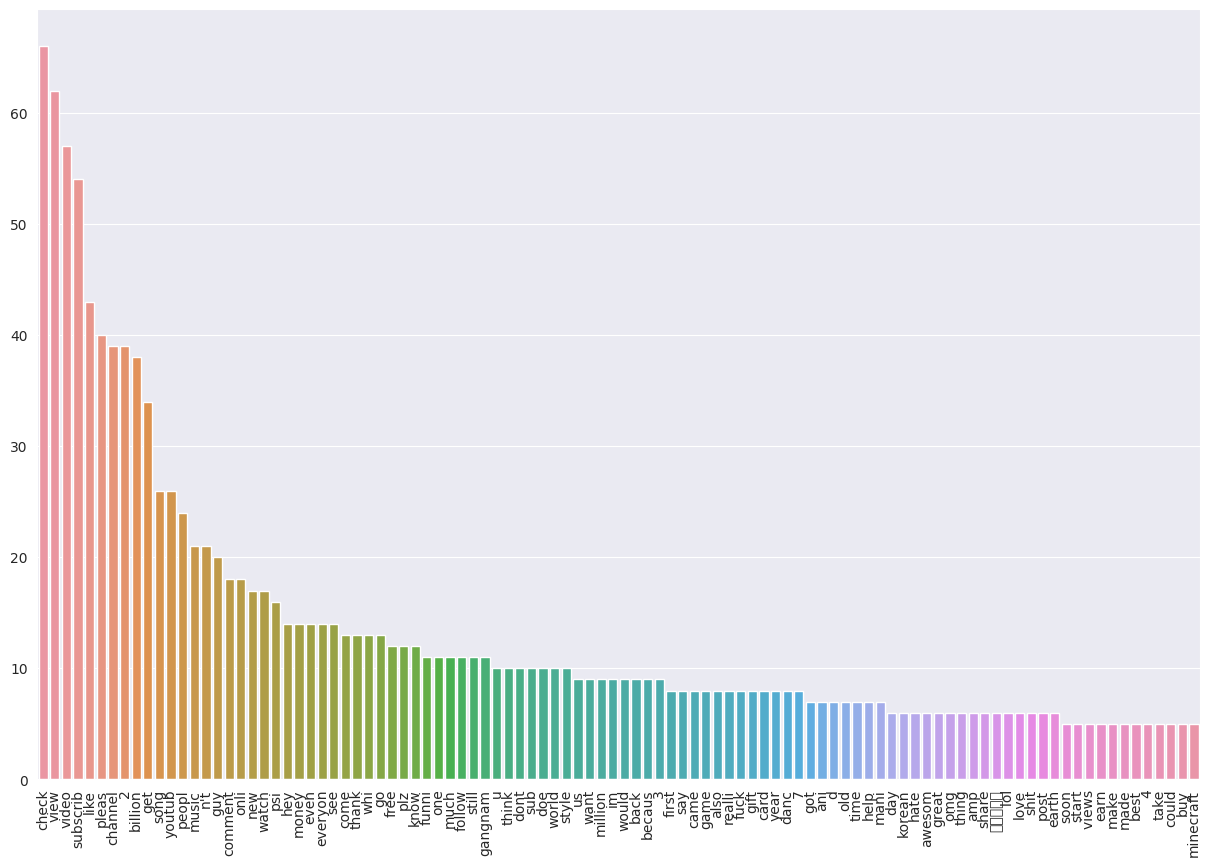

In [37]:
# Let us plot the top 100 most frequent words in the comments.

#ignore warning
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')
plt.figure(figsize=(15, 10))
plt.xticks(fontsize=10, rotation=90)
plt.yticks(fontsize=10)

sns.barplot(x=[i[0] for i in sorted_word_counts[:100]], y=[i[1] for i in sorted_word_counts[:100]])

# Lemmatization
Lemmatization is the process of grouping together the different inflected forms of a word so they can be analysed as a single item.

In [3]:
# Download the wordnet packages for the wordnet lemmatizer

from nltk.stem import WordNetLemmatizer
nltk.download("wordnet")
nltk.download("omw-1.4")

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [40]:
# Stemming is the process of reducing a word to its stem form. For example, learning, learns, learned are all reduced to learn.
# Lemmatization is the process of reducing a word to its lemma or dictionary form. For example, learned, learnt are all reduced to learn.


# Note how the stemmer is more aggressive than the lemmatizer. The stemmer reduces words to their stem form without considering the context of the sentence. The lemmatizer considers the context of the sentence and reduces the word to its lemma form.

# Let's use the snowball stemmer to stem the words.
import nltk
from nltk.stem import SnowballStemmer
snowball = SnowballStemmer(language='english')

# Example inflections to reduce
words = ['learnt', 'learnability', 'atypicality', 'this',"programer","programers","programs"]

print("SB Stemmer")
for word in words:
    print(word,"--->",snowball.stem(word))

# Let's use the WordNetLemmatizer to lemmatize the words.



from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

print("\n\n\nWordNet Lemmatizer")
for word in words:
    print(word,"--->",lemmatizer.lemmatize(word))


SB Stemmer
learnt ---> learnt
learnability ---> learnabl
atypicality ---> atyp
this ---> this
programer ---> program
programers ---> program
programs ---> program



WordNet Lemmatizer
learnt ---> learnt
learnability ---> learnability
atypicality ---> atypicality
this ---> this
programer ---> programer
programers ---> programers
programs ---> program


#### You’ve seen how to implement both techniques, but how do they compare? 

The main differences between stemming and lemmatization lay in how each technique arrives at the objective of reducing inflected words to a common base root. 

Stemming algorithms attempt to find the common base roots of various inflections by cutting off the endings or beginnings of the word. 
The chop is based on a list of common prefixes and suffixes that can typically be found in inflected words. 
This non-discriminatory nature act of chopping words may occasionally lead to finding meaningful word stems, but other times it does not. 



On the other hand, lemmatization algorithms attempt to find common base roots from inflected words by conducting a morphological analysis. 
To accurately reduce inflections, a detailed dictionary must be kept so the algorithm can search through to link an inflected word back to its lemma.

The crude heuristic approach taken by stemming algorithms typically means they’re fast and efficient but not always accurate. 
In contrast, lemmatization algorithms sacrifice speed and efficiency for accuracy, thus, resulting in meaningful base roots. 

Hence, for accuracy choose lemmatization over stemming. For speed and efficiency, choose stemming over lemmatization.

In [ ]:
Possible references:

https://datascience.stackexchange.com/questions/57191/is-there-a-good-german-stemmer

